In [ ]:
#IMPORT PACKAGES
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
#READ THE DATA
df=pd.read_csv("/content/ZOMATO_DATA_ANALYSIS.csv",encoding="ISO-8859-1")

In [ ]:
df.head()

Restaurant ID         Restaurant Name  ...  Rating text Votes
0        6317637        Le Petit Souffle  ...    Excellent   314
1        6304287        Izakaya Kikufuji  ...    Excellent   591
2        6300002  Heat - Edsa Shangri-La  ...    Very Good   270
3        6318506                    Ooma  ...    Excellent   365
4        6314302             Sambo Kojin  ...    Excellent   229

[5 rows x 21 columns]

In [ ]:
#SHAPE OF THE DATA
df.shape

(9551, 21)

In [ ]:
#COLUMNS IN THE DATASET
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
#KNOWING THE DATATYPE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
#STATISTICAL INFORMATION OF THE DATASET
df.describe()

Restaurant ID  Country Code  ...  Aggregate rating         Votes
count   9.551000e+03   9551.000000  ...       9551.000000   9551.000000
mean    9.051128e+06     18.365616  ...          2.666370    156.909748
std     8.791521e+06     56.750546  ...          1.516378    430.169145
min     5.300000e+01      1.000000  ...          0.000000      0.000000
25%     3.019625e+05      1.000000  ...          2.500000      5.000000
50%     6.004089e+06      1.000000  ...          3.200000     31.000000
75%     1.835229e+07      1.000000  ...          3.700000    131.000000
max     1.850065e+07    216.000000  ...          4.900000  10934.000000

[8 rows x 8 columns]

In [ ]:
#DROP DUPLICATES
df.drop_duplicates(inplace = True)
df.shape

(9551, 21)

In [ ]:

#DROP NA VALUES
df.dropna(inplace = True)


In [ ]:
#SHAPE OF THE DATA
df.shape

(9542, 21)

In [ ]:

#UNIQUE VALUES
df['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [ ]:
#STANDARIZING A VARIABLE FOR CURRENCY
cleanup_curr = {"Currency":   
{'Botswana Pula(P)': '0.09', 'Brazilian Real(R$)':'0.18', 
 'Dollar($)':'1',
'Emirati Diram(AED)':'0.27',
 'Indian Rupees(Rs.)':'0.013',
'Indonesian Rupiah(IDR)':'0.000071', 
 'NewZealand($)':'0.72', 'Pounds(\x8c£)':'1.38',
'Qatari Rial(QR)':'0.27', 'Rand(R)':'0.068',
 'Sri Lankan Rupee(LKR)':'0.005', 'Turkish Lira(TL)':'0.11'}}

In [ ]:
obj_df = df.replace(cleanup_curr)
obj_df.head()

Restaurant ID         Restaurant Name  ...  Rating text Votes
0        6317637        Le Petit Souffle  ...    Excellent   314
1        6304287        Izakaya Kikufuji  ...    Excellent   591
2        6300002  Heat - Edsa Shangri-La  ...    Very Good   270
3        6318506                    Ooma  ...    Excellent   365
4        6314302             Sambo Kojin  ...    Excellent   229

[5 rows x 21 columns]

In [ ]:
#NUMERIC CONVERSION
obj_df["Currency"] = obj_df["Currency"].apply(pd.to_numeric)

In [ ]:
obj_df['cost2'] = obj_df['Average Cost for two'] * obj_df['Currency']

In [ ]:
obj_df.drop(['Currency','Average Cost for two'], axis=1, inplace=True)

In [ ]:
obj_df.head()

Restaurant ID         Restaurant Name  ...  Votes  cost2
0        6317637        Le Petit Souffle  ...    314   99.0
1        6304287        Izakaya Kikufuji  ...    591  108.0
2        6300002  Heat - Edsa Shangri-La  ...    270  360.0
3        6318506                    Ooma  ...    365  135.0
4        6314302             Sambo Kojin  ...    229  135.0

[5 rows x 20 columns]

In [ ]:
obj_df.describe()

Restaurant ID  Country Code  ...         Votes        cost2
count   9.542000e+03   9542.000000  ...   9542.000000  9542.000000
mean    9.043301e+06     18.179208  ...    156.772060    10.864202
std     8.791967e+06     56.451600  ...    430.203324    18.063408
min     5.300000e+01      1.000000  ...      0.000000     0.000000
25%     3.019312e+05      1.000000  ...      5.000000     3.900000
50%     6.002726e+06      1.000000  ...     31.000000     6.500000
75%     1.835260e+07      1.000000  ...    130.000000    10.400000
max     1.850065e+07    216.000000  ...  10934.000000   540.000000

[8 rows x 8 columns]

In [ ]:
cleanup_country = {"Country Code":
{1:'India',14:'Australia',30:'Brazil',
37:'Canada',94:'Indonesia',148:'New Zealand',
162:'Phillipines',166:'Qatar',
184:'Singapore',189:'South Africa',
191:'Sri Lanka',
208:'Turkey',214:'UAE',
215:'United Kingdom',
216:'United States'}}

In [ ]:
obj_df= obj_df.replace(cleanup_country)
obj_df.head(3)

Restaurant ID         Restaurant Name Country Code  ... Rating text Votes  cost2
0        6317637        Le Petit Souffle  Phillipines  ...   Excellent   314   99.0
1        6304287        Izakaya Kikufuji  Phillipines  ...   Excellent   591  108.0
2        6300002  Heat - Edsa Shangri-La  Phillipines  ...   Very Good   270  360.0

[3 rows x 20 columns]

In [ ]:
def show_values(axs, orient="v", space=0.1):
  def _single(ax):
    if orient == "v":

            for p in ax.patches:

                _x = p.get_x() + p.get_width() / 2

                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)

                value = '{:.0f}'.format(p.get_height())

                ax.text(_x, _y, value, ha="center") 

    elif orient == "h":

        for p in ax.patches:

            _x = p.get_x() + p.get_width() + float(space)

            _y = p.get_y() + p.get_height() - (p.get_height()*0.5)

            value = '{:.0f}'.format(p.get_width())

            ax.text(_x, _y, value, ha="left")



  if isinstance(axs, np.ndarray):

      for idx, ax in np.ndenumerate(axs):

          _single(ax)

  else:

      _single(axs)

Text(0.5, 1.0, 'Average Price for two Across Countries')

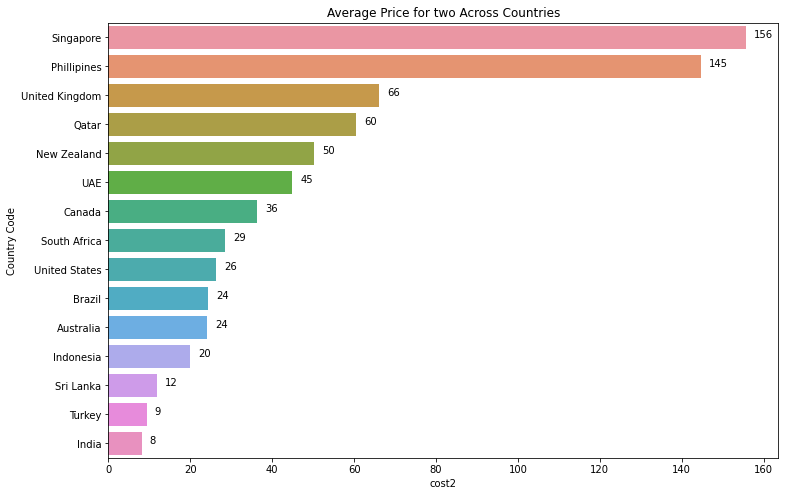

In [ ]:
c = obj_df['cost2']
d = obj_df['Country Code']
fig, ax = plt.subplots(figsize=(12,8))
order = obj_df.groupby(["Country Code"])["cost2"].mean().sort_values(ascending=False).index
p = sns.barplot(x=c, y=d, ci=None, data=obj_df,order=order)
show_values(p, "h", space=2)
plt.title('Average Price for two Across Countries')

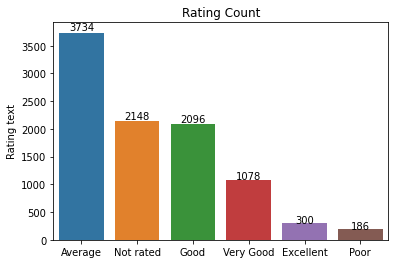

In [ ]:
#sns.countplot(x='Rating text', data=obj_df)
a=obj_df['Rating text'].value_counts().astype(int)
p=sns.barplot(x=a.index,y=a)
plt.title('Rating Count')
show_values(p,"v",space=6)

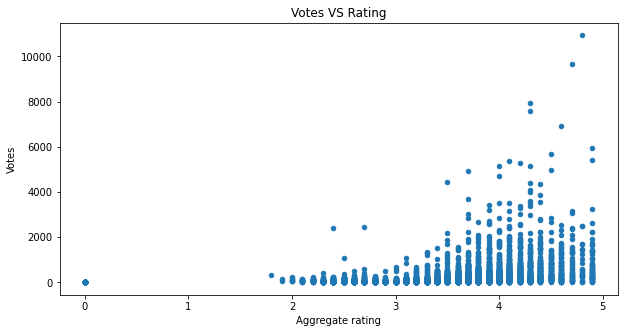

In [ ]:
obj_df.plot.scatter(y='Votes', x='Aggregate rating', 
figsize=(10,5), title="Votes"+" VS "+ 'Rating')

Average of Votes according to Rating text

Text(0.5, 1.0, 'Restaurants Ratings Count')

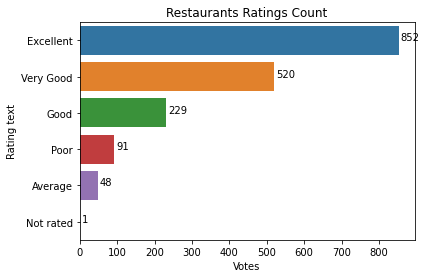

In [ ]:
c = obj_df["Rating text"]
d = obj_df["Votes"]
order = obj_df.groupby(["Rating text"])["Votes"].mean().sort_values(ascending=False).index
p = sns.barplot(x=d,y=c,ci=None,order=order)
show_values(p, "h", space=6)
plt.title('Restaurants Ratings Count')

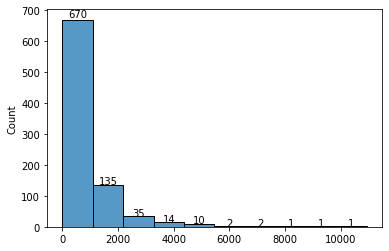

In [ ]:
#Histogram for Votes by India
obj_df1 = obj_df[obj_df['Country Code'] == 'India']
f = obj_df1['Votes'].value_counts()
p = sns.histplot(x=f.index, bins=10)
show_values(p, "v", space=2)

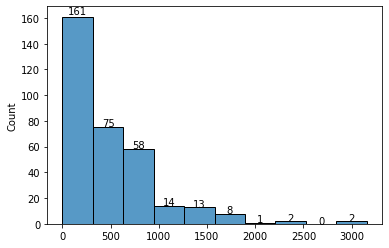

In [ ]:
#Histogram for Votes by USA
obj_df2 = obj_df[obj_df['Country Code'] == 'United States']
f = obj_df2['Votes'].value_counts()
p = sns.histplot(x=f.index, bins=10)
show_values(p, "v", space=2)

In [ ]:
import folium

In [ ]:
"""with plt.style.context('dark_background'):
    cnt = df_train.loc[df_train['Country Code']==1, 'City'].value_counts().to_frame()
    f = plt.figure(figsize = (12,6))
    ax = plt.subplot2grid((1,2),(0,0))
    squarify.plot(sizes = cnt.values, label = cnt.index,
                  color = sns.color_palette('Paired', 11), alpha = 0.5, ax = ax)
    ax.set_title("TreeMap of India City Count", fontsize = 13)
    ax = plt.subplot2grid((1,2),(0,1))
    cnt = df_train.loc[df_train['Country Code']==216, 'City'].value_counts().to_frame()
    squarify.plot(sizes = cnt.values, label = cnt.index,
                  color = sns.color_palette('Paired', 11), alpha = 0.5, ax = ax)
    ax.set_title("TreeMap of USA City Count", fontsize = 13)
    plt.show()
    """

tr_India = df.loc[df['Country Code'] == 1,['Latitude', 'Longitude']]
map_F = folium.Map(location = [20, 79], zoom_start = 4,prefer_canvas=True)
for i, (lat, lon) in enumerate(tr_India.values): folium.Marker([lat, lon]).add_to(map_F)
outfp = "base_map.html"
map_F.save(outfp)
map_F

In [ ]:
import folium
import webbrowser
class Map:
    def __init__(self, center, zoom_start):
        self.center = center
        self.zoom_start = zoom_start
    
    def showMap(self):
        #Create the map
        my_map = folium.Map(location = self.center, zoom_start = self.zoom_start)

        #Display the map
        my_map.save("map.html")
        webbrowser.open("map.html")


#Define coordinates of where we want to center our map
tr_India = df.loc[df['Country Code'] == 1,['Latitude', 'Longitude']]
coords = tr_India
map_F = folium.Map(location = [20, 79], zoom_start = 4,prefer_canvas=True)
for i, (lat, lon) in enumerate(tr_India.values): folium.Marker([lat, lon]).add_to(map_F)
outfp = "map2.html"
map_F.save(outfp)
map_F

In [ ]:
pip install squarify

In [ ]:
import squarify

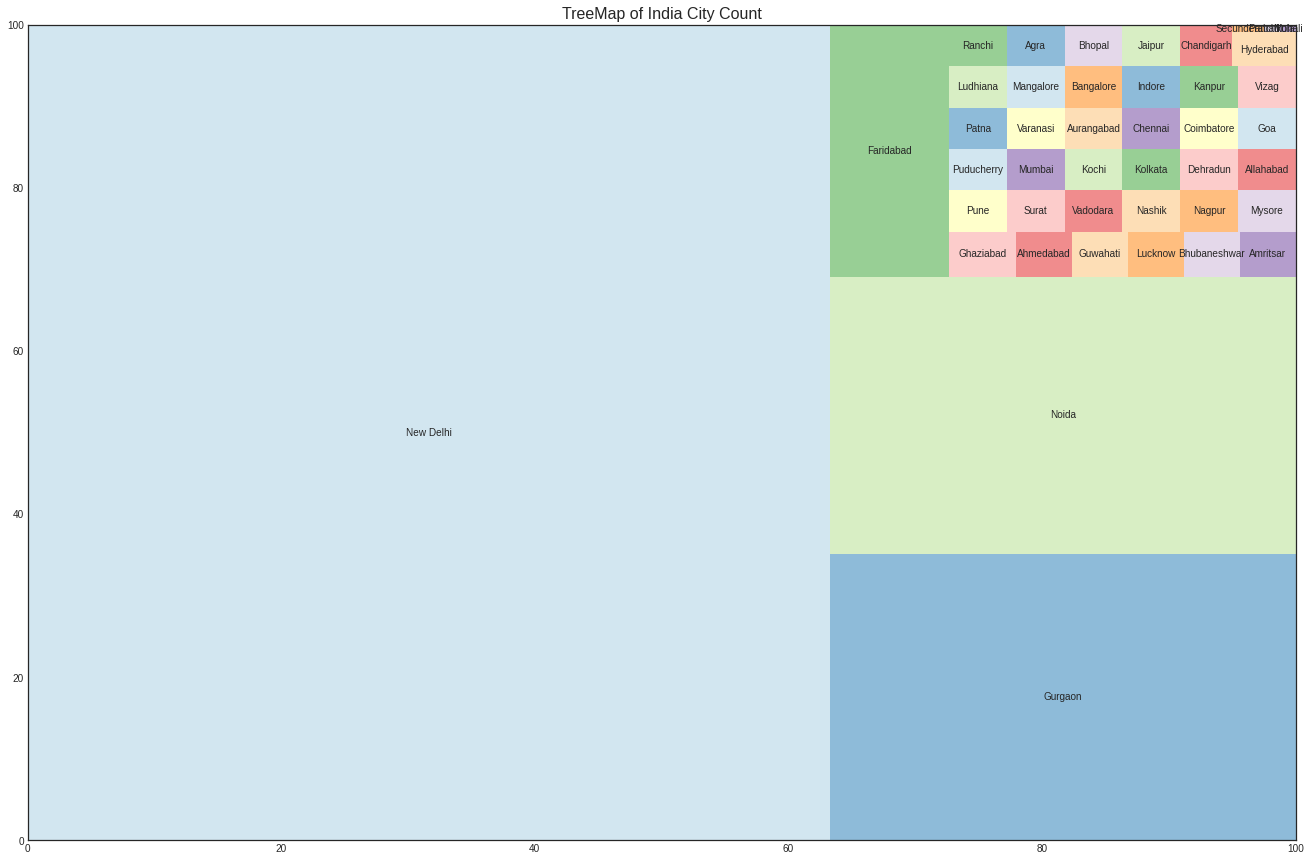

In [ ]:
with plt.style.context('seaborn-white'):
    cnt = df.loc[df['Country Code']==1, 'City'].value_counts().to_frame()
    f = plt.figure(figsize = (50,15))
    ax = plt.subplot2grid((1,2),(0,0))
    squarify.plot(sizes = cnt.values, label = cnt.index,
                  color = sns.color_palette('Paired', 11), alpha = 0.5, ax = ax, bar_kwargs={'alpha':.7}, text_kwargs={'fontsize':10})
    ax.set_title("TreeMap of India City Count", fontsize = 16)
    #ax = plt.subplot2grid((1,2),(0,1))
    # cnt = df.loc[df['Country Code']==216, 'City'].value_counts().to_frame()
    # squarify.plot(sizes = cnt.values, label = cnt.index,
    #               color = sns.color_palette('Paired', 11), alpha = 0.5, ax = ax)
    # ax.set_title("TreeMap of USA City Count", fontsize = 13)
    plt.savefig('hm')
    plt.show()

In [ ]:

# #with plt.style.context('dark_background'):
# #cnt = df.loc[df['Country Code']==1, ].value_counts().to_frame()
# cnt= df['Cuisines'].value_counts().head(20)



# f = plt.figure(figsize = (50,15))
# ax = plt.subplot2grid((1,2),(0,0))
# squarify.plot(sizes = cnt.values, label = cnt,
#               color = sns.color_palette('Paired', 11), alpha = 0.5, ax = ax)
# ax.set_title("TreeMap of top 20 Cuisines", fontsize = 13)
# #ax = plt.subplot2grid((1,2),(0,1))
# # cnt = df.loc[df['Country Code']==216, 'City'].value_counts().to_frame()
# # squarify.plot(sizes = cnt.values, label = cnt.index,
# #               color = sns.color_palette('Paired', 11), alpha = 0.5, ax = ax)
# # ax.set_title("TreeMap of USA City Count", fontsize = 13)
# plt.show()

In [ ]:
cuisines = cnt.index
cuisines

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Ahmedabad',
       'Guwahati', 'Lucknow', 'Bhubaneshwar', 'Amritsar', 'Pune', 'Puducherry',
       'Patna', 'Ludhiana', 'Ranchi', 'Surat', 'Vadodara', 'Nashik', 'Nagpur',
       'Mysore', 'Mumbai', 'Varanasi', 'Mangalore', 'Agra', 'Kochi', 'Kolkata',
       'Dehradun', 'Allahabad', 'Aurangabad', 'Bangalore', 'Bhopal', 'Chennai',
       'Coimbatore', 'Goa', 'Indore', 'Jaipur', 'Kanpur', 'Vizag',
       'Chandigarh', 'Hyderabad', 'Secunderabad', 'Panchkula', 'Mohali'],
      dtype='object')

In [ ]:
c_count = cnt.values
c_count

array([[5473],
       [1118],
       [1080],
       [ 251],
       [  25],
       [  21],
       [  21],
       [  21],
       [  21],
       [  21],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  20],
       [  18],
       [  18],
       [   2],
       [   1],
       [   1]])

<Figure size 432x288 with 0 Axes>

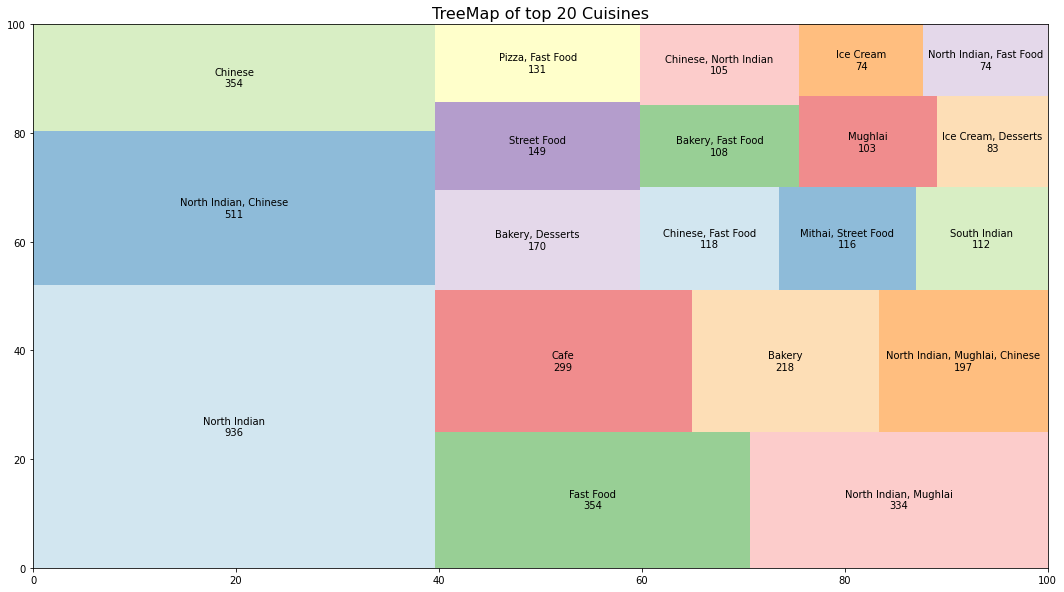

In [ ]:
d={'cuisine':['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       'Pizza, Fast Food', 'Chinese, Fast Food', 'Mithai, Street Food',
       'South Indian', 'Bakery, Fast Food', 'Chinese, North Indian', 'Mughlai',
       'Ice Cream, Desserts', 'Ice Cream', 'North Indian, Fast Food'],
   'counts':[936, 511, 354, 354, 334, 299, 218, 197, 170, 149, 131, 118, 116,
       112, 108, 105, 103,  83,  74,  74]}
dd = pd.DataFrame(data=d)
labels = [f'{cuisine}\n{count}' for cuisine, count in zip(dd.cuisine, dd.counts)]
fig = plt.gcf()
# ax = fig.add_subplot()
# fig.set_size_inches(16, 4.5)
f = plt.figure(figsize = (40,10))
ax = plt.subplot2grid((1,2),(0,0))

norm = matplotlib.colors.Normalize(vmin=min(dd.counts), vmax=max(dd.counts))
# colors = [matplotlib.cm.Blues(norm(value)) for value in dd.counts]
# squarify.plot(label=labels, sizes=dd.counts, alpha=.7, color=colors)
# plt.axis('off')
# plt.show()

squarify.plot(sizes = dd.counts, label = labels,
              color = sns.color_palette('Paired', 11), alpha = 0.5, ax = ax)
ax.set_title("TreeMap of top 20 Cuisines", fontsize = 16)

plt.savefig("a")
plt.show()

Text(0.5, 0, 'Cost2')

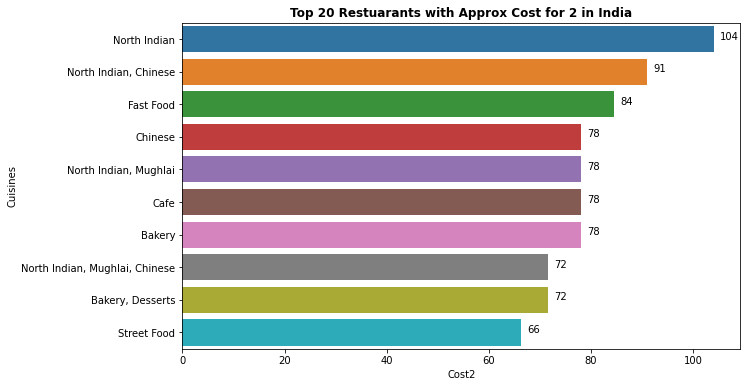

In [ ]:
obj_df3 = obj_df[obj_df['Country Code'] == 'India']
x = obj_df3['cost2'].nlargest(10)
dishind= obj_df3['Cuisines'].value_counts()[:10]
plt.figure(figsize=(10,6))
p = sns.barplot(x=x, y=dishind.index)
show_values(p, "h", space=1.2)
plt.title('Top 20 Restuarants with Approx Cost for 2 in India',weight='bold')
plt.ylabel('Cuisines')
plt.xlabel('Cost2')

Text(0.5, 0, 'Cost2')

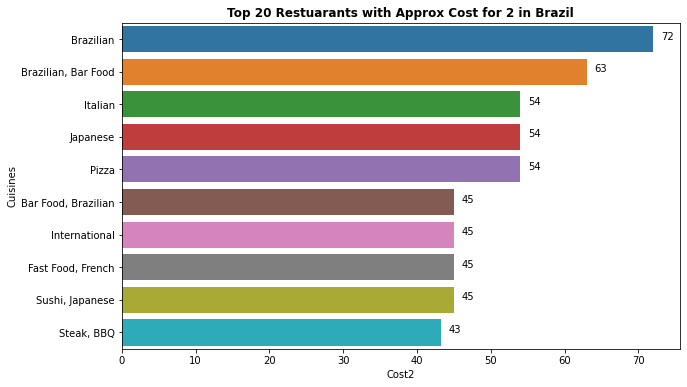

In [ ]:
obj_df4 = obj_df[obj_df['Country Code'] == 'Brazil']
x = obj_df4['cost2'].nlargest(10)
dishbrz= obj_df4['Cuisines'].value_counts()[:10]
plt.figure(figsize=(10,6))
p = sns.barplot(x=x, y=dishbrz.index)
show_values(p, "h", space=1.01)
plt.title('Top 20 Restuarants with Approx Cost for 2 in Brazil',weight='bold')
plt.ylabel('Cuisines')
plt.xlabel('Cost2')

Text(0.5, 0, 'Cost2')

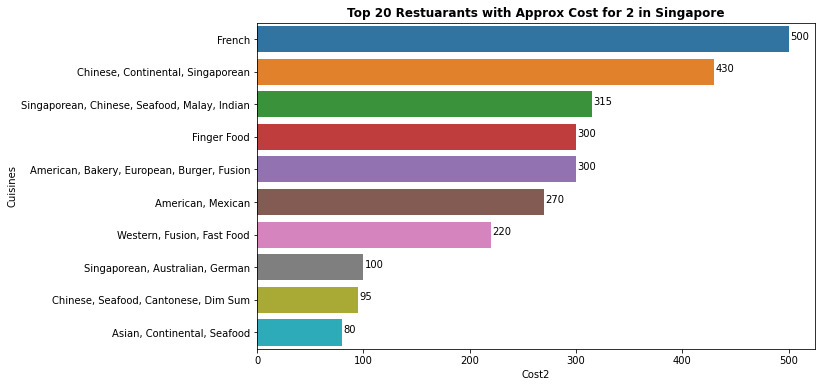

In [ ]:
obj_df5 = obj_df[obj_df['Country Code'] == 'Singapore']
x = obj_df5['cost2'].nlargest(10)
dishsing= obj_df5['Cuisines'].value_counts()[:10]
plt.figure(figsize=(10,6))
p = sns.barplot(x=x, y=dishsing.index)
show_values(p, "h", space=1.2)
plt.title('Top 20 Restuarants with Approx Cost for 2 in Singapore',weight='bold')
plt.ylabel('Cuisines')
plt.xlabel('Cost2')

In [ ]:
!pip install plotly

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(obj_df['Country Code'].value_counts().index)

values = list(obj_df['Country Code'].value_counts().values)

fig = {

    "data":[

        {

            "labels" : labels,

            "values" : values,

            "hoverinfo" : 'label+percent',

            "domain": {"x": [0, .9]},

            "hole" : 0.6,

            "type" : "pie",

            "rotation":120,

        },

    ],

    "layout": {

        "title" : "Zomato's Presence around the World",

        "annotations": [

            {

                "font": {"size":20},

                "showarrow": True,

                "text": "Countries",

                "x":0.2,

                "y":0.9,

            },

        ]

    }

}



iplot(fig)

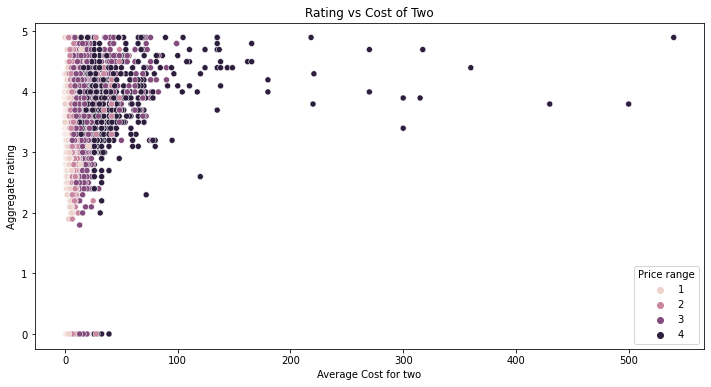

In [ ]:
plt.figure(figsize=(12,6))

sns.scatterplot(x="cost2", y="Aggregate rating", hue='Price range', data=obj_df)

plt.xlabel("Average Cost for two")

plt.ylabel("Aggregate rating")

plt.title('Rating vs Cost of Two');

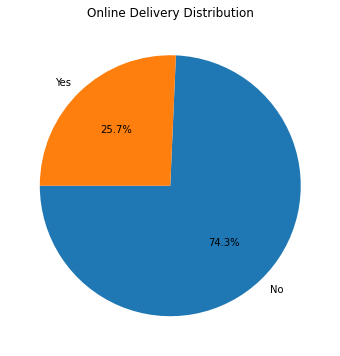

In [ ]:
plt.figure(figsize=(12,6))

plt.title('Online Delivery Distribution')

plt.pie(obj_df['Has Online delivery'].value_counts()/9551*100,
labels=obj_df['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180);

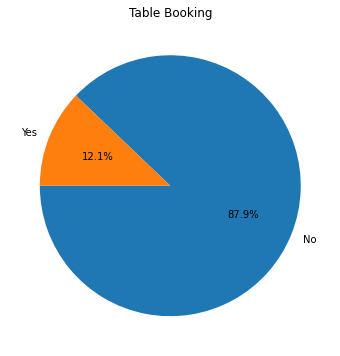

In [ ]:
plt.figure(figsize=(12,6))

plt.title('Table Booking')

plt.pie(obj_df['Has Table booking'].value_counts()/9551*100,
labels=obj_df['Has Table booking'].value_counts().index, autopct='%1.1f%%', startangle=180);

Model : Cost Prediction

In [ ]:
obj_df.drop(columns=['Restaurant ID','Restaurant Name','Is delivering now','Switch to order menu','Price range','Rating color'],axis=1,inplace=True)
obj_df.drop(columns=['Address','Locality','Locality Verbose'],axis=1,inplace=True)

In [ ]:
obj_df.head()

Country Code              City   Longitude  ...  Rating text Votes  cost2
0  Phillipines       Makati City  121.027535  ...    Excellent   314   99.0
1  Phillipines       Makati City  121.014101  ...    Excellent   591  108.0
2  Phillipines  Mandaluyong City  121.056831  ...    Very Good   270  360.0
3  Phillipines  Mandaluyong City  121.056475  ...    Excellent   365  135.0
4  Phillipines  Mandaluyong City  121.057508  ...    Excellent   229  135.0

[5 rows x 11 columns]

Filtering India and 4 large cities

In [ ]:
obj_df[obj_df['Country Code']==1]
obj_df=obj_df[obj_df['City'].isin(['New Delhi','Gurgaon','Noida','Faridabad'])]
# Drop country code 
obj_df.drop(columns=['Country Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
obj_df.head()

City  Longitude   Latitude  ... Rating text Votes cost2
865  Faridabad  77.306640  28.490059  ...     Average     4  3.25
866  Faridabad  77.304776  28.490157  ...     Average    16  6.50
867  Faridabad  77.305563  28.490137  ...     Average     8  1.95
868  Faridabad  77.306102  28.490098  ...     Average     8  1.95
869  Faridabad  77.305745  28.490062  ...     Average     7  1.30

[5 rows x 10 columns]

In [ ]:
encoder= LabelEncoder()
obj_df['City']=encoder.fit_transform(obj_df['City'])
obj_df['Has Table booking']=encoder.fit_transform(obj_df['Has Table booking'])
obj_df['Has Online delivery']=encoder.fit_transform(obj_df['Has Online delivery'])
obj_df['Rating text']=encoder.fit_transform(obj_df['Rating text'])
#to solve multi encoding problem so 3 is not given more weightage than..say 1 or delhi
#so just change them to columns from rows
# one hot encoding is what this is called
# then reomve multi-collinearity using get dummies
obj_df=pd.get_dummies(obj_df, columns=['City','Rating text'],drop_first=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
obj_df.head()

Longitude   Latitude  ... Rating text_4  Rating text_5
865  77.306640  28.490059  ...             0              0
866  77.304776  28.490157  ...             0              0
867  77.305563  28.490137  ...             0              0
868  77.306102  28.490098  ...             0              0
869  77.305745  28.490062  ...             0              0

[5 rows x 16 columns]

In [ ]:
cuisine=obj_df.groupby('Cuisines').mean()['cost2'].reset_index()
obj_df=obj_df.merge(cuisine,on='Cuisines')
#mean value of cuisines we got so dropping original cuisines
obj_df.drop(columns=['Cuisines'],axis=1,inplace=True)
obj_df.rename(columns={'Average Cost for two_y':'Cuisines'},inplace=True)

In [ ]:
obj_df.head()

Longitude   Latitude  ...  Rating text_5   cost2_y
0  77.306640  28.490059  ...              0  4.875000
1  77.049525  28.806199  ...              0  4.875000
2  77.304776  28.490157  ...              0  7.725949
3   0.000000   0.000000  ...              0  7.725949
4  77.305698  28.471985  ...              0  7.725949

[5 rows x 16 columns]

In [ ]:
obj_df.corr()
obj_df.corr()['cost2_x']

Longitude              0.071752
Latitude               0.070993
Has Table booking      0.642966
Has Online delivery    0.076953
Aggregate rating       0.328440
Votes                  0.299089
cost2_x                1.000000
City_1                 0.076877
City_2                -0.010528
City_3                -0.040303
Rating text_1          0.088936
Rating text_2          0.231485
Rating text_3         -0.262226
Rating text_4          0.011642
Rating text_5          0.256787
cost2_y                0.808274
Name: cost2_x, dtype: float64

Training Model

In [ ]:
X=obj_df.drop(columns=['cost2_x']).values
Y=obj_df['cost2_x'].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6337, 15)
(1585, 15)
(6337,)
(1585,)


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred=reg.predict(X_test)
## Evaluations

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)
#output - 0.7390459937346496

0.7390459937346496

In [ ]:
Y_pred[2]

14.459873387337726

In [ ]:
Y_test[2]

13.0

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.7390459937346496

In [ ]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor()
r.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
r.score(X_train,Y_train)

0.9634531859535063

In [ ]:
r.score(X_test,Y_test)

0.7750347124427321

In [ ]:
Y_pred=r.predict(X_test)

In [ ]:
a=pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
a

Actual  Predicted
0       1.95     3.5815
1      10.40     7.9755
2      13.00    12.8635
3       1.30     3.7700
4       9.10     5.9215
...      ...        ...
1580    3.90     2.7365
1581    3.90     4.7320
1582    6.50     3.2825
1583   19.50    19.8120
1584    3.25     2.7430

[1585 rows x 2 columns]

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
mape = np.mean(np.abs((Y_test - Y_pred) / np.abs(Y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 1.9773820478793602
Mean Squared Error (MSE): 15.001570107944051
Root Mean Squared Error (RMSE): 3.8731860409673136
Mean Absolute Percentage Error (MAPE): 33.58
Accuracy: 66.42


**Training 2**

In [ ]:

newdf=df.replace(cleanup_curr)
newdf["Currency"] = newdf["Currency"].apply(pd.to_numeric)
newdf['cost2'] = newdf['Average Cost for two'] * newdf['Currency']
newdf.drop(['Currency','Average Cost for two'], axis=1, inplace=True)
newdf.head()

Restaurant ID         Restaurant Name  ...  Votes  cost2
0        6317637        Le Petit Souffle  ...    314   99.0
1        6304287        Izakaya Kikufuji  ...    591  108.0
2        6300002  Heat - Edsa Shangri-La  ...    270  360.0
3        6318506                    Ooma  ...    365  135.0
4        6314302             Sambo Kojin  ...    229  135.0

[5 rows x 20 columns]

In [ ]:
encoder= LabelEncoder()
newdf['City']=encoder.fit_transform(newdf['City'])
newdf['Has Table booking']=encoder.fit_transform(newdf['Has Table booking'])
newdf['Has Online delivery']=encoder.fit_transform(newdf['Has Online delivery'])
newdf['Rating text']=encoder.fit_transform(newdf['Rating text'])
newdf['Cuisines']=encoder.fit_transform(newdf['Cuisines'])

In [ ]:
newdf.head()

Restaurant ID         Restaurant Name  ...  Votes  cost2
0        6317637        Le Petit Souffle  ...    314   99.0
1        6304287        Izakaya Kikufuji  ...    591  108.0
2        6300002  Heat - Edsa Shangri-La  ...    270  360.0
3        6318506                    Ooma  ...    365  135.0
4        6314302             Sambo Kojin  ...    229  135.0

[5 rows x 20 columns]

In [ ]:

newdf['Rating text'].value_counts()

0    3734
3    2148
2    2096
5    1078
1     300
4     186
Name: Rating text, dtype: int64

In [ ]:
newdf.corr()['Aggregate rating']

Restaurant ID         -0.327160
Country Code           0.281295
City                  -0.130848
Longitude             -0.114733
Latitude               0.000197
Cuisines              -0.080832
Has Table booking      0.190351
Has Online delivery    0.226250
Price range            0.438356
Aggregate rating       1.000000
Rating text           -0.182835
Votes                  0.313474
cost2                  0.283894
Name: Aggregate rating, dtype: float64

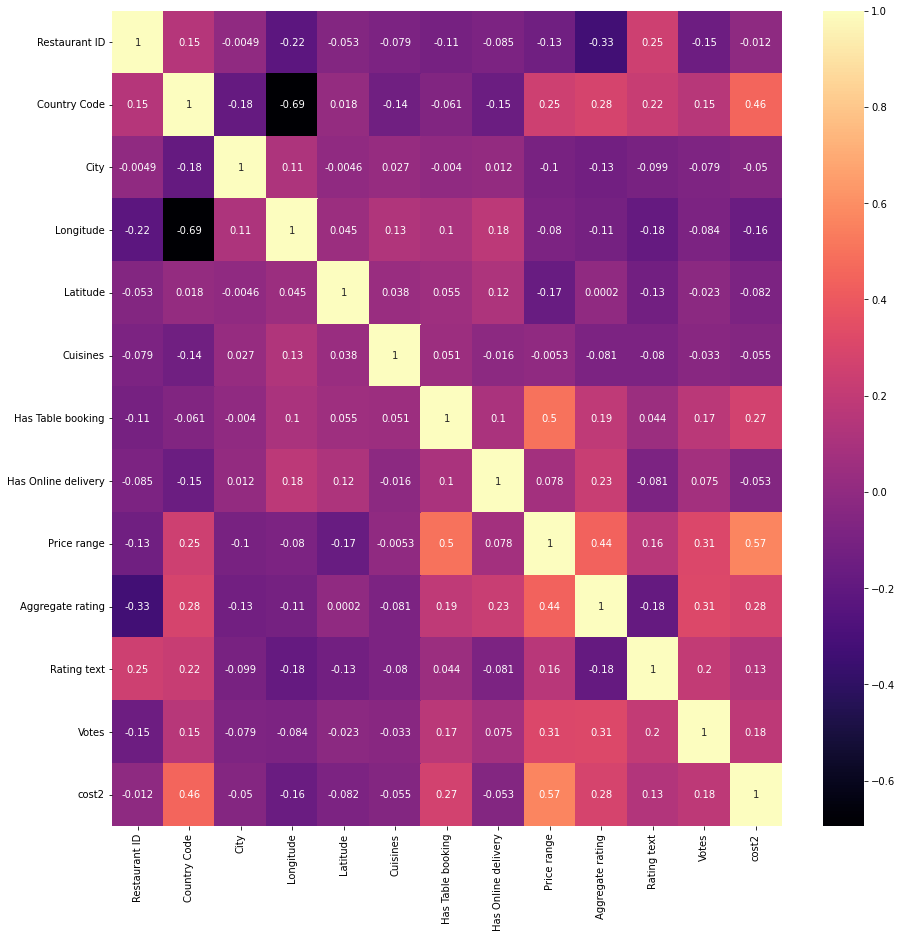

In [ ]:
#newdf.corr()
plt.figure(figsize=(15,15))
sns.heatmap(newdf.corr(), annot=True, cmap='magma')
plt.savefig('k')

In [ ]:
newdf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'cost2'],
      dtype='object')

In [ ]:
my_data=newdf.iloc[:,[2,3,10,11,15,18,19]]
my_data.to_csv('Zomato_df.csv') 

In [ ]:
x = newdf.iloc[:,[2,3,10,11,18,19]]
x.head()

Country Code  City  Has Table booking  Has Online delivery  Votes  cost2
0           162    73                  1                    0    314   99.0
1           162    73                  1                    0    591  108.0
2           162    75                  1                    0    270  360.0
3           162    75                  0                    0    365  135.0
4           162    75                  1                    0    229  135.0

In [ ]:

y = df['Aggregate rating']
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9542, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

Linear Regression

In [ ]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
y_pred=lr_model.predict(x_test)
r2_score(y_test,y_pred)

0.23642508110636562

Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
RF_Model.score(x_train,y_train)

0.9893607709316953

In [ ]:
RF_Model.score(x_test,y_test)

0.949123401259305

In [ ]:
y_predict=RF_Model.predict(x_test)

In [ ]:
a=pd.DataFrame({"Actual":y_test,"Predicted":y_predict})
a

Actual  Predicted
692      3.4   3.648000
1382     3.7   3.272667
5889     3.8   3.598083
8722     3.5   3.201200
8185     0.0   0.000000
...      ...        ...
4481     2.7   3.695333
1488     3.9   3.862000
891      4.0   4.010000
7182     3.6   3.362000
8888     3.4   2.851833

[1909 rows x 2 columns]

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
mape = np.mean(np.abs((y_test - y_predict) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 0.22053932897590675
Mean Squared Error (MSE): 0.11635306517688022
Root Mean Squared Error (RMSE): 0.3411056510480004
Mean Absolute Percentage Error (MAPE): 8.82
Accuracy: 91.18


In [ ]:
a=pd.DataFrame({"Actual":y_test,"Predicted":y_predict})
a.to_csv('observed.csv') 

Text(0.5, 1.0, 'Rating test and predicted data')

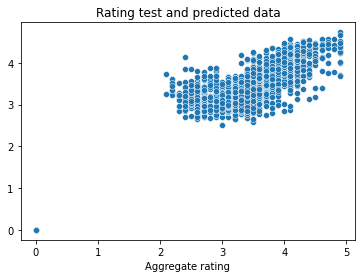

In [ ]:
sns.scatterplot(y=y_predict, x=y_test)
plt.title("Rating test and predicted data")

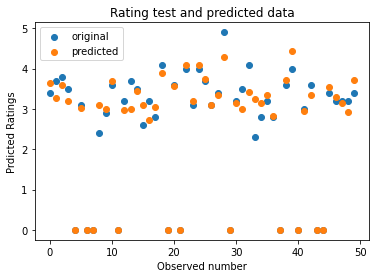

In [ ]:
number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.scatter(x_ax, y_test[:number_of_observations], label="original")

plt.scatter(x_ax, y_predict[:number_of_observations], label="predicted")

plt.title("Rating test and predicted data")

plt.xlabel('Observed number')

plt.ylabel('Prdicted Ratings')

plt.legend()

plt.show()